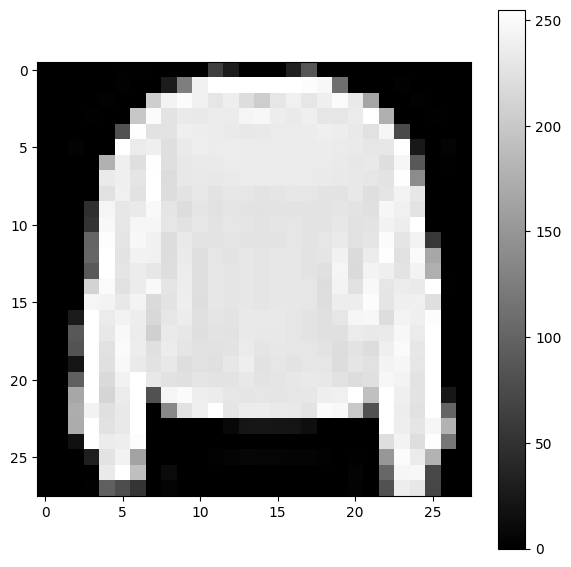

In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import mean
from numpy import std
# Import the fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize a sample image
plt.figure(figsize=(7, 7))
plt.imshow(train_images[7], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [43]:

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

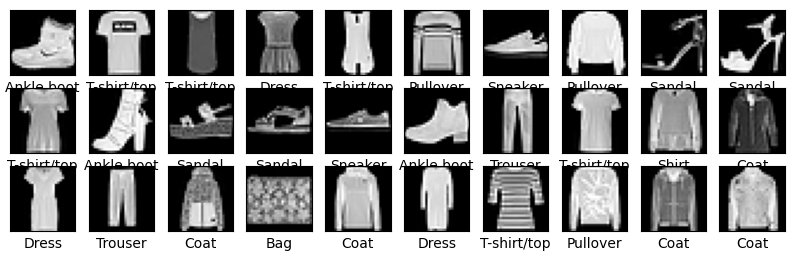

In [44]:

# Visualize multiple images
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Reshape the images
x_train = train_images.reshape((60000, 28, 28, 1))
x_test = test_images.reshape((10000, 28, 28, 1))


In [45]:

# Create the model
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, train_labels, epochs=15, validation_split=.2, verbose=2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

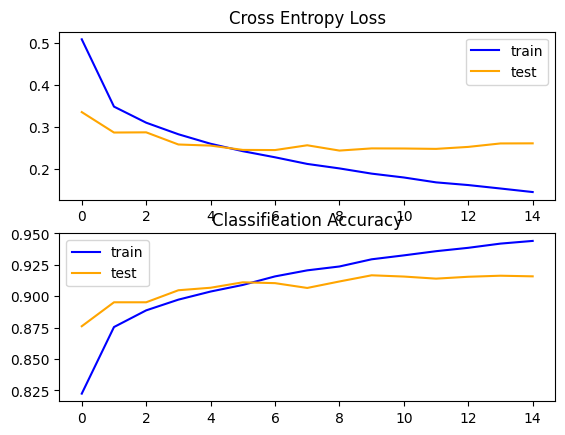

In [46]:
histories=list()
histories.append(history)
def summarize_diagnostics(histories):
 for i in range(len(histories)):
 # plot loss
     pyplot.subplot(211)
     pyplot.title('Cross Entropy Loss')
     pyplot.plot(histories[i].history['loss'], color='blue', label='train')
     pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
     plt.legend(loc="upper right")
 # plot accuracy
     pyplot.subplot(212)
     pyplot.title('Classification Accuracy')
     pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
     pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
     plt.legend(loc="upper left")
     pyplot.show()

summarize_diagnostics(histories)

In [47]:
# Evaluate the model on training data
score = model.evaluate(x_train, train_labels)
print('Train Loss & Accuracy:', score)

# Evaluate the model on test data
score = model.evaluate(x_test, test_labels)
print('Test Loss & Accuracy:', score)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.1188 - accuracy: 0.9602
Train Loss & Accuracy: [0.11877977102994919, 0.9601500034332275]
313/313 [==============================] - 1s 3ms/step - loss: 0.2719 - accuracy: 0.9143
Test Loss & Accuracy: [0.2718948423862457, 0.9143000245094299]


313/313 [==============================] - 1s 2ms/step
[1.1422719e-11 1.0682059e-13 2.2073905e-12 1.7386671e-14 3.0359651e-15
 1.2231433e-06 6.0646719e-13 2.0166461e-07 6.2579989e-12 9.9999857e-01]
9


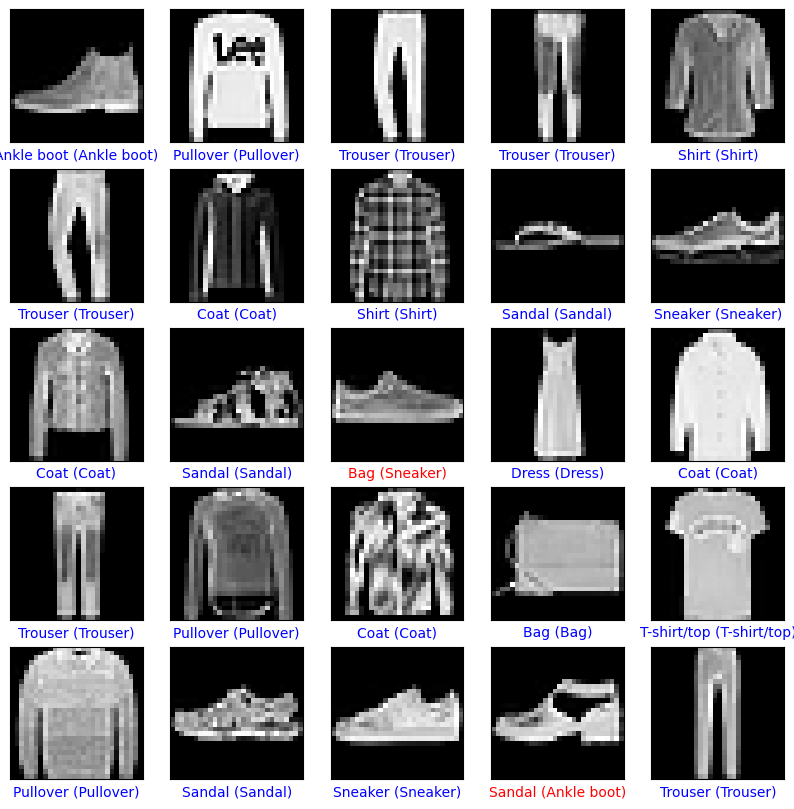

In [49]:

# Make predictions
predictions = model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))

# Visualize predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.show()
